# OVERVIEW OF THE PROJECT: AIRBNB NEW USER BOOKINGS

Instead of waking to overlooked "Do not disturb" signs, Airbnb travelers find themselves rising with the birds in a whimsical treehouse, having their morning coffee on the deck of a houseboat, or cooking a shared regional breakfast with their hosts.

New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries. By accurately predicting where a new user will book their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand.

The project focusses on predicting the destination countries on the basis of various parameters mentioned.

## DATA EXPLORATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
%matplotlib inline
from sklearn.model_selection import train_test_split

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

Generally, when we want to explore the data, we are looking to answer the following questions:

* Is there any mistakes in the data?
* Does the data have peculiar behavior?
* Do I need to fix or remove any of the data to be more realistic?

In [2]:
# Load the data into DataFrames

train_users= pd.read_csv("train_users_2.csv")
test_users = pd.read_csv("test_users.csv")

In [3]:
print("We have", train_users.shape[0], "users in the training set and", 
      test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [4]:
# training data
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [5]:
# test data
test_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


### Data cleaning

In [6]:
#replacing gender and age values which are not present to Nan
train_users.gender.replace('-unknown-',np.nan, inplace=True)
test_users.gender.replace('-unknown-',np.nan, inplace=True)
train_users.age.replace('NaN', np.nan, inplace=True)
test_users.age.replace('NaN',np.nan, inplace=True)
print(train_users.head())

           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

   gender   age signup_method  signup_flow language affiliate_channel  \
0     NaN   NaN      facebook            0       en            direct   
1    MALE  38.0      facebook            0       en               seo   
2  FEMALE  56.0         basic            3       en            direct   
3  FEMALE  42.0      facebook            0       en            direct   
4     NaN  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type 

In [7]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

# Remove ID's since now we are not interested in making predictions
users.drop('id',axis=1, inplace=True)

users.head()

affiliate_channel affiliate_provider   age country_destination  \
0            direct             direct   NaN                 NDF   
1               seo             google  38.0                 NDF   
2            direct             direct  56.0                  US   
3            direct             direct  42.0               other   
4            direct             direct  41.0                  US   

  date_account_created date_first_booking first_affiliate_tracked  \
0           2010-06-28                NaN               untracked   
1           2011-05-25                NaN               untracked   
2           2010-09-28         2010-08-02               untracked   
3           2011-12-05         2012-09-08               untracked   
4           2010-09-14         2010-02-18               untracked   

  first_browser first_device_type  gender language signup_app  signup_flow  \
0        Chrome       Mac Desktop     NaN       en        Web            0   
1        Chrome       Mac Desktop    MALE       en        Web            0   
2            IE   Windows Desktop  FEMALE       en        Web            3   
3       Firefox       Mac Desktop  FEMALE       en        Web            0   
4        Chrome       Mac Desktop     NaN       en        Web            0   

  signup_method  timestamp_first_active  
0      facebook          20090319043255  
1      facebook          20090523174809  
2         basic          20090609231247  
3      facebook          20091031060129  
4         basic          20091208061105

### Dealing with Missing Data

Usually the missing data comes in the way of NaN, but if we take a look at the DataFrame printed above we can see at the gender column some values being -unknown-. We will need to transform those values into NaN first:

Let's compute the percentage of missing data:

In [8]:
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0].drop('country_destination')

age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

We have quite a lot of NaN in the age and gender wich will yield in lesser performance of the classifiers we will build. The feature date_first_booking has a 68% of NaN values because this feature is not present at the tests users, and therefore, we won't need it at the modeling part.

In [9]:
#dealing with Age:

users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

From above, we can see that there is some inconsistency in the age data.

In [10]:
print(sum(users.age > 122))
print(sum(users.age < 18))

830
188


This is the incnsistency as the age values above show either longest living span of humans or the age where people are breaking the basic Airbnb Eligibility terms.

The simple thing to overcome this inconsistency is to set an acceptance range and put those out of it to NaN.

In [11]:
users.loc[users.age > 95, 'age'] = np.nan
users.loc[users.age < 13, 'age'] = np.nan

# Visualization Of Data

## Univariate Analysis:

## Gender

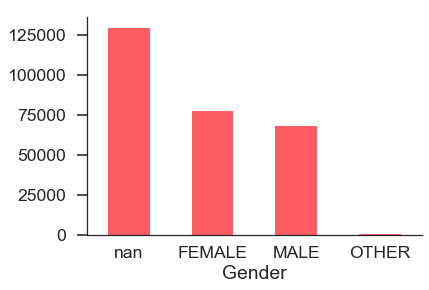

In [12]:
users.gender.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
sns.despine()

As we've seen before at this plot we can see the ammount of missing data in perspective. Also, notice that there is a slight difference between user gender.

Next thing it might be interesting to see if there is any gender preferences when travelling:

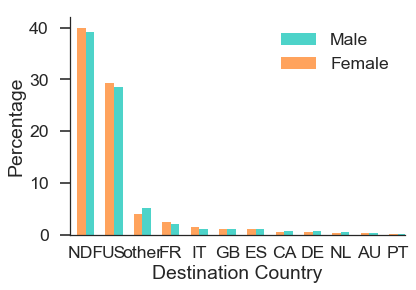

In [13]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.3

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

There are no big differences between the 2 main genders, so this plot it's not really ussefull except to know the relative destination frecuency of the countries. Let's see it clear here:

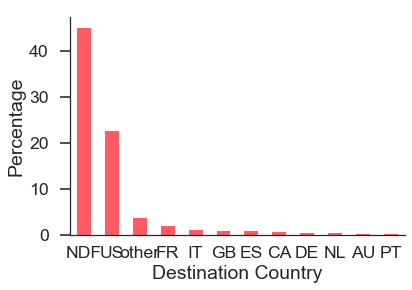

In [14]:
destination_percentage = users.country_destination.value_counts() / users.shape[0] * 100
destination_percentage.plot(kind='bar',color='#FD5C64', rot=0)
# Using seaborn can also be plotted
# sns.countplot(x="country_destination", data=users, order=list(users.country_destination.value_counts().keys()))
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()



The first thing we can see that if there is a reservation, it's likely to be inside the US. But there is a 45% of people that never did a reservation.

## Age

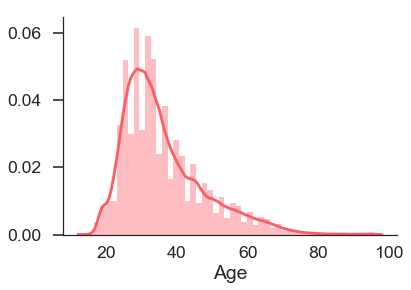

In [15]:
sns.distplot(users.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()

As expected, the common age to travel is between 25 and 40. Let's see if, for example, older people travel in a different way. Let's pick an arbitrary age to split into two groups. Maybe 45?

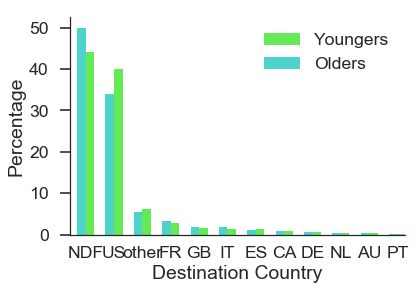

In [16]:
age = 45

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()


We can see that the young people tends to stay in the US, and the older people choose to travel outside the country. Of vourse, there are no big differences between them and we must remember that we do not have the 42% of the ages.

The first thing I thought when reading the problem was the importance of the native lenguage when choosing the destination country. So let's see how manny users use english as main language:

In [17]:
print((sum(users.language == 'en') / users.shape[0])*100)

96.3675888324


With the 96% of users using English as their language, it is understandable that a lot of people stay in the US. Someone maybe thinking, if the language is important, why not travel to GB? We need to remember that there is also a lot of factor we are not acounting so making assumpions or predictions like that might be dangerous.

## Device Used

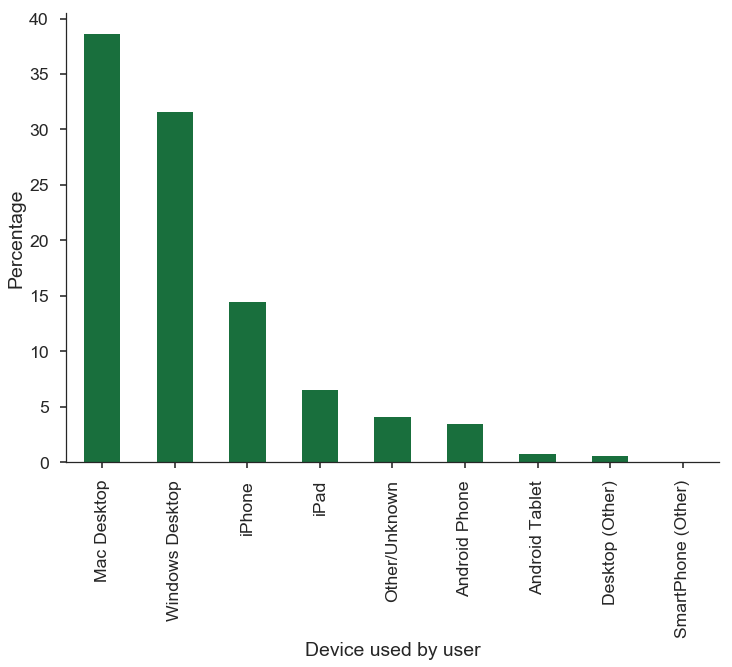

In [18]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = users.first_device_type.value_counts() / users.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

From the above, we can conclude that the number of Mac users and that too usinga desktop Mac are more. (44.15%)

# RANDOM FOREST

In [19]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [20]:
#read files, join - MUST HAVE FILES IN LOCAL DIRECTORY
train = pd.read_csv('train_users_2.csv')
countries = pd.read_csv('countries.csv')
demographics = pd.read_csv('age_gender_bkts.csv')

In [21]:
train.date_account_created = train.date_account_created.astype('datetime64')

In [22]:
train['date_first_booking'] = pd.to_datetime(train['date_first_booking'], errors='coerce')

### Data Exploration

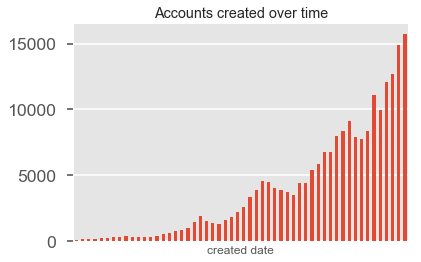

In [23]:
#Accounts created over time - Appendix [4]
train.groupby([train["date_account_created"].dt.year,train["date_account_created"].dt.month,])['id'].count().plot(kind='bar')
plt.xlabel("created date")
plt.title("Accounts created over time")
plt.xticks([])
#plt.savefig("CreatedOverTime")
plt.show()

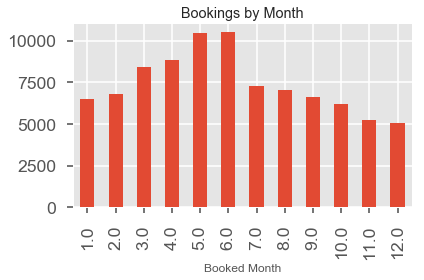

In [24]:
#Bookings by Month - appendix [5]
train.groupby(train["date_first_booking"].dt.month)['id'].count().plot(kind='bar')
plt.xlabel("Booked Month")
plt.title("Bookings by Month")
plt.tight_layout()
plt.savefig("Monthly")
plt.show()

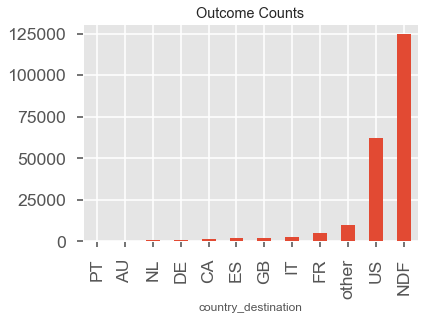

In [25]:
#check baseline for desintation country - Appendix[3]
train.groupby(train["country_destination"])['id'].count().sort_values().plot(kind='bar')
plt.title("Outcome Counts")
#plt.savefig("outcomecoountry")
plt.show()

#which algorithms do best with unbalanced datasets?

In [26]:
train.head()

id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaT   
1  820tgsjxq7           2011-05-25          20090523174809                NaT   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [27]:
#reduce the gender categories to 3 values from 4
train.gender[train.gender == 'OTHER'] = '-unknown-'

In [28]:
#set erroneous age values to NaN
train.age[train.age<18] = np.nan
train.age[train.age>100] = np.nan

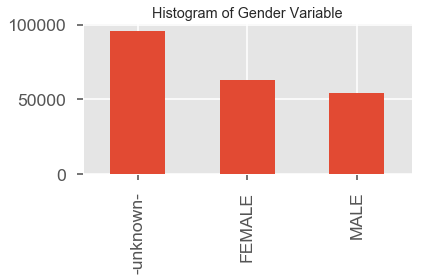

In [29]:
#Plot the distribution of genders
train.gender.value_counts().plot(kind='bar')
plt.title('Histogram of Gender Variable')
plt.tight_layout()
#plt.savefig("genderDist")
plt.show()

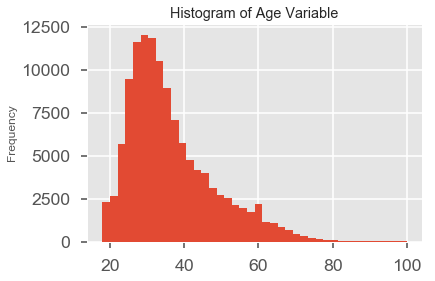

In [30]:
#Plot the distribution of age
train.age.plot(kind='hist',bins=40)
plt.title('Histogram of Age Variable')
#plt.savefig("ageDist")
plt.show()

### Data Preparation for Modelling

In [31]:
#Create Age Buckets to add to our onehot encoded data frame

train['Age_Over40'] = (train.age >39).map({True:1,False:0})
train['Age_31-39'] = ((train.age<40) & (train.age>30)).map({True:1,False:0})
train['Age_Under31'] = (train.age <31).map({True:1,False:0})
train['Age_unknown'] = (train.age.isnull()).map({True:1,False:0})

In [32]:
#reorder columns to have all features to encode side by side
cols = train.columns.tolist()
cols.insert(0,cols.pop(5))
cols.insert(0,cols.pop(15))
train = train[cols]

#one hot encoding to prepare for modelling
encoding = pd.get_dummies(train.iloc[:,6:16],columns =train.iloc[:,6:16].columns, prefix=list(train.columns[6:16]))
onehot = pd.concat([train.iloc[:,:6],encoding,train.iloc[:,16:20]],axis=1)

In [33]:
#train test split dataset to measure performance. Original test_users dataset provided by airbnb does not come with labels
# so we need to create our own test set
x_train,x_test,y_train,y_test = train_test_split(onehot,onehot['country_destination'],test_size=0.25,random_state=1)

### Modeling

Random Forest

In [34]:
#Random forest classification - instantiate classifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [35]:
#fit RF classifier 

clf.fit(x_train.iloc[:,6:156],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
#predict and store predictions in a series 

preds = clf.predict(x_test.iloc[:,6:156])

In [37]:
#add the series to our dataframe

x_test['predicted_country'] = preds

In [38]:
#import packages used for model evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,f1_score,recall_score
def score(true,pred):
    return(precision_score(true,pred,average='weighted'),
          recall_score(true,pred,average='weighted'),
          f1_score(true,pred,average='weighted'))

In [39]:
#get overall accuracy score for the RF model

accuracy_score(x_test['country_destination'],x_test['predicted_country'])

0.62224762475872797

In [40]:
onehot.head()

country_destination   age          id date_account_created  \
0                 NDF   NaN  gxn3p5htnn           2010-06-28   
1                 NDF  38.0  820tgsjxq7           2011-05-25   
2                  US  56.0  4ft3gnwmtx           2010-09-28   
3               other  42.0  bjjt8pjhuk           2011-12-05   
4                  US  41.0  87mebub9p4           2010-09-14   

   timestamp_first_active date_first_booking  gender_-unknown-  gender_FEMALE  \
0          20090319043255                NaT                 1              0   
1          20090523174809                NaT                 0              0   
2          20090609231247         2010-08-02                 0              1   
3          20091031060129         2012-09-08                 0              1   
4          20091208061105         2010-02-18                 1              0   

   gender_MALE  signup_method_basic     ...       \
0            0                    0     ...        
1            1                    0     ...        
2            0                    1     ...        
3            0                    0     ...        
4            0                    1     ...        

   first_browser_Sogou Explorer  first_browser_Stainless  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   first_browser_TenFourFox  first_browser_TheWorld Browser  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         0                               0   

   first_browser_Yandex.Browser  first_browser_wOSBrowser  Age_Over40  \
0                             0                         0           0   
1                             0                         0           0   
2                             0                         0           1   
3                             0                         0           1   
4                             0                         0           1   

   Age_31-39  Age_Under31  Age_unknown  
0          0            0            1  
1          1            0            0  
2          0            0            0  
3          0            0            0  
4          0            0            0  

[5 rows x 156 columns]

In [42]:
#FEATURE SELECTION - check most important features to the random forest algorithm

featureImportance = pd.DataFrame(clf.feature_importances_,onehot.columns[6:158],columns=['feature_importance']).sort_values(["feature_importance"],ascending=False)
featureImportance.head(10)

feature_importance
Age_unknown                                  0.154434
signup_method_facebook                       0.050395
Age_31-39                                    0.049922
signup_method_basic                          0.048138
gender_-unknown-                             0.046131
Age_Under31                                  0.034326
gender_FEMALE                                0.029262
Age_Over40                                   0.028917
first_affiliate_tracked_untracked            0.027563
first_affiliate_tracked_linked               0.024618

In [43]:
#split the data again using only the top 27 features

x_train,x_test,y_train,y_test = train_test_split(onehot.loc[:,list(featureImportance[:27].index)],onehot['country_destination'],test_size=0.25,random_state=1)

In [44]:
#Generate Predictions for RF classifier with 27 features

clf = RandomForestClassifier()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [45]:
#New accuracy score - .4% improvement in classification, and a simpler model !

RF = accuracy_score(y_test,preds)
RF

0.62498360287090304

## NAIVE BAYES

In [46]:
#import NB package

from sklearn.naive_bayes import BernoulliNB

In [47]:
#Generate predictions using Naive Bayes

clf = BernoulliNB()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [48]:
#NB accuracy score - 56.6%, lower than baseline

BNB = accuracy_score(y_test,preds)
BNB

0.56614133388302756

## NEURAL NETWORKS

In [49]:
#import NN package

from sklearn.neural_network import MLPClassifier

In [50]:
#Generate prediction using Neural Net

clf = MLPClassifier()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [51]:
#Neural Network accuracy score - 63.6%

NN = accuracy_score(y_test,preds)
NN

0.63607743192848976

## WRAP UP

In [52]:
#Accuracy of each model

pd.DataFrame({'Random Forest':RF,'Bernoulli Naive Bayes':BNB,'Neural Network':NN,'Baseline':0.58},index=[0])

Baseline  Bernoulli Naive Bayes  Neural Network  Random Forest
0      0.58               0.566141        0.636077       0.624984